# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_longs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
longs = np.random.uniform(long_range[0], long_range[1], size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, long combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
q_url = f"{base_url}&appid={weather_api_key}&units={units}&q="


In [4]:
# Test with one city

test_city = cities[0]
test_url = q_url + test_city
response = requests.get(test_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': -28.7001, 'lon': 26.4597},
 'dt': 1717089706,
 'id': 1015969,
 'main': {'feels_like': 53.65,
          'grnd_level': 862,
          'humidity': 36,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 56.61,
          'temp_max': 56.61,
          'temp_min': 56.61},
 'name': 'Brandfort',
 'sys': {'country': 'ZA',
         'id': 1884,
         'sunrise': 1717045104,
         'sunset': 1717082726,
         'type': 1},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 332, 'gust': 7.49, 'speed': 6.93}}


In [5]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = q_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)

        status_code = response.status_code
        
        if status_code == 200:
            city_weather = response.json()
        else:
            city_weather = {}         

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat")
        city_long = city_weather.get("coord", {}).get("lon")
        city_max_temp = city_weather.get("main", {}).get("temp_max")
        city_humidity = city_weather.get("main", {}).get("humidity")
        city_clouds = city_weather.get("clouds", {}).get("all")
        city_wind = city_weather.get("wind", {}).get("speed")
        city_country = city_weather.get("sys", {}).get("country")
        city_date = city_weather.get("dt", {})

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Long": city_long, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
       print("City {e} not found. Skipping...")
       pass

    time.sleep(0.5)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | brandfort
Processing Record 2 of Set 1 | idri
Processing Record 3 of Set 1 | san andros
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | thinadhoo
Processing Record 6 of Set 1 | akonolinga
Processing Record 7 of Set 1 | flin flon
Processing Record 8 of Set 1 | puerto san carlos
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | sidi salim
Processing Record 13 of Set 1 | burang
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | jbail
Processing Record 18 of Set 1 | ulanhot
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | anadyr
Processing Record 22 of Set 1 | georgetown
Processing R

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           565
Long          565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          599
dtype: int64

In [89]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        599 non-null    object 
 1   Lat         565 non-null    float64
 2   Long        565 non-null    float64
 3   Max Temp    565 non-null    float64
 4   Humidity    565 non-null    float64
 5   Cloudiness  565 non-null    float64
 6   Wind Speed  565 non-null    float64
 7   Country     560 non-null    object 
 8   Date        599 non-null    object 
dtypes: float64(6), object(3)
memory usage: 46.8+ KB


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,brandfort,-28.7001,26.4597,56.61,36.0,2.0,6.93,ZA,1717089706
1,idri,27.5000,13.2667,98.04,9.0,0.0,8.63,LY,1717089707
2,san andros,NaN,NaN,NaN,NaN,NaN,NaN,None,{}
3,tiksi,71.6872,128.8694,36.81,88.0,55.0,2.57,RU,1717089474
4,thinadhoo,0.5333,72.9333,84.31,81.0,83.0,19.46,MV,1717089709


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,brandfort,-28.7001,26.4597,56.61,36.0,2.0,6.93,ZA,1717089706
1,idri,27.5000,13.2667,98.04,9.0,0.0,8.63,LY,1717089707
2,san andros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{}
3,tiksi,71.6872,128.8694,36.81,88.0,55.0,2.57,RU,1717089474
4,thinadhoo,0.5333,72.9333,84.31,81.0,83.0,19.46,MV,1717089709


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

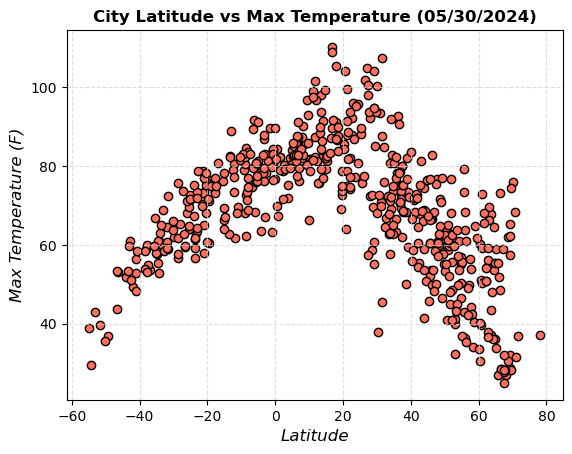

In [36]:
# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

plt.scatter(x, y, marker='o', facecolor='#FE6F5E', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temperature (05/30/2024)', fontweight="bold", fontsize=12)
plt.xlabel('Latitude', fontsize=12, fontstyle="italic")
plt.ylabel('Max Temperature (F)',fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

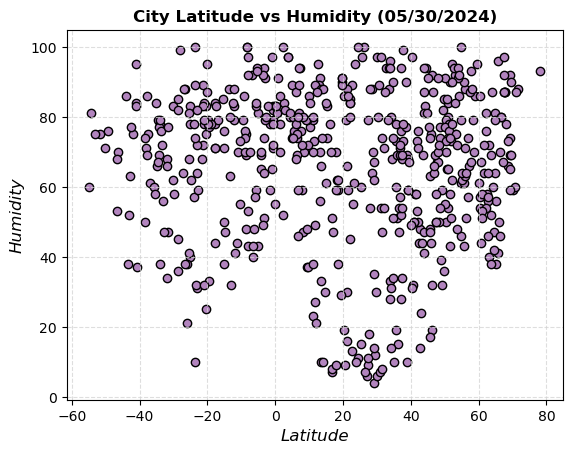

In [33]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df["Lat"]
y = city_data_df["Humidity"]

plt.scatter(x, y, marker='o', facecolor='#B284BE', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (05/30/2024)', fontweight="bold", fontsize=12)
plt.xlabel('Latitude', fontsize=12, fontstyle="italic")
plt.ylabel('Humidity',fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

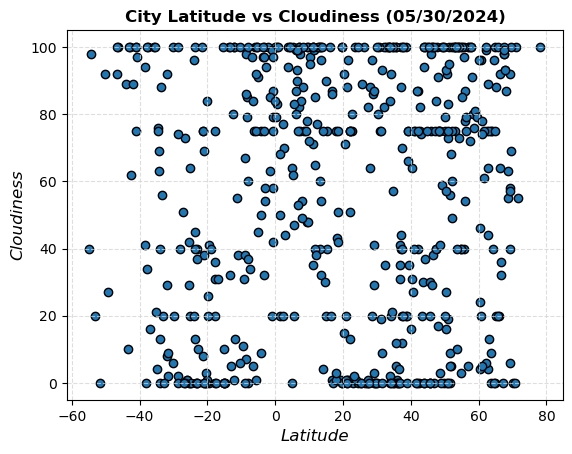

In [34]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]

plt.scatter(x, y, marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (05/30/2024)', fontweight="bold", fontsize=12)
plt.xlabel('Latitude', fontsize=12, fontstyle="italic")
plt.ylabel('Cloudiness',fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

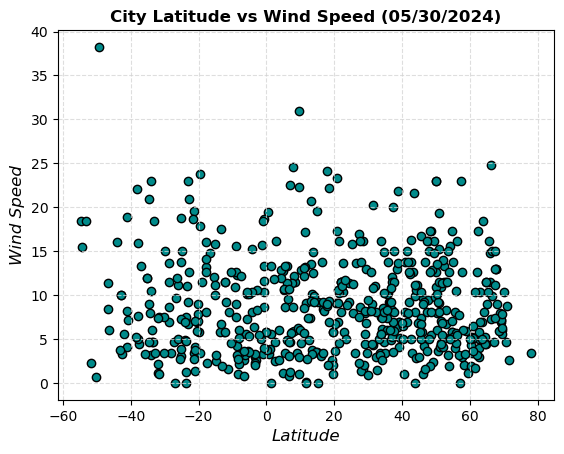

In [37]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]

plt.scatter(x, y, marker='o', facecolor='#008B8B', edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (05/30/2024)', fontweight="bold", fontsize=12)
plt.xlabel('Latitude', fontsize=12, fontstyle="italic")
plt.ylabel('Wind Speed',fontsize=12, fontstyle="italic")
plt.grid(color="lightgrey", linestyle = "--", alpha=0.75)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [95]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, y_label, eq_coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = slope * x_values + intercept
    line_eq = "Y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, edgecolor='#696969')
    plt.plot(x_values, regression_values)
    plt.annotate(line_eq, eq_coord, color="#C51E3A")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)

    print(f"R-value: {rvalue**2}")
    plt.show()

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,idri,27.5000,13.2667,98.04,9.0,0.0,8.63,LY,1717089707
3,tiksi,71.6872,128.8694,36.81,88.0,55.0,2.57,RU,1717089474
4,thinadhoo,0.5333,72.9333,84.31,81.0,83.0,19.46,MV,1717089709
5,akonolinga,3.7667,12.2500,71.96,97.0,94.0,5.99,CM,1717089709
6,flin flon,54.7682,-101.8650,57.04,100.0,100.0,5.75,CA,1717089637


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,brandfort,-28.7001,26.4597,56.61,36.0,2.0,6.93,ZA,1717089706
9,edinburgh of the seven seas,-37.0676,-12.3116,53.74,61.0,16.0,13.33,SH,1717089712
14,bredasdorp,-34.5322,20.0403,55.35,79.0,76.0,8.99,ZA,1717089420
15,avarua,-21.2078,-159.7750,78.85,89.0,75.0,3.44,CK,1717089440
18,west island,-12.1568,96.8225,80.58,83.0,100.0,11.50,CC,1717089393


###  Temperature vs. Latitude Linear Regression Plot

R-value: 0.5611559984424848


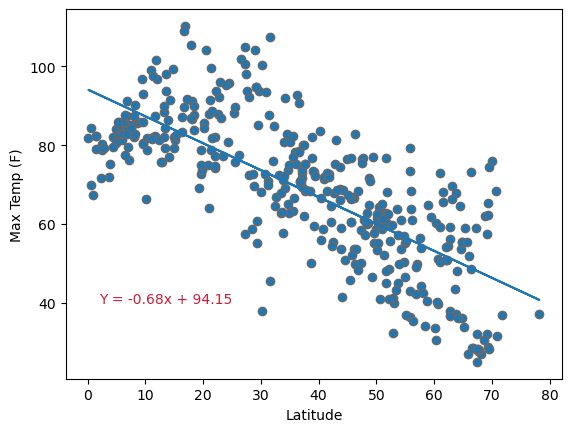

In [97]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "City Latitude vs Max Temperature (F)"
eq_coord = (2, 40)

linear_regression(x_values, y_values, title, "Max Temp (F)", eq_coord)

R-value: 0.7158197520498867


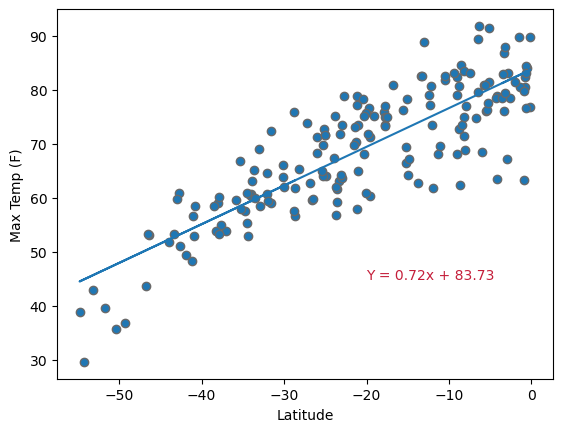

In [98]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "City Latitude vs Max Temperature (F)"
eq_coord = (-20, 45)

linear_regression(x_values, y_values, title, "Max Temp (F)", eq_coord)

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and temperature, indicating that temperatures decrease more the farther the city is from the equator.

### Humidity vs. Latitude Linear Regression Plot

R-value: 0.0013811124740230798


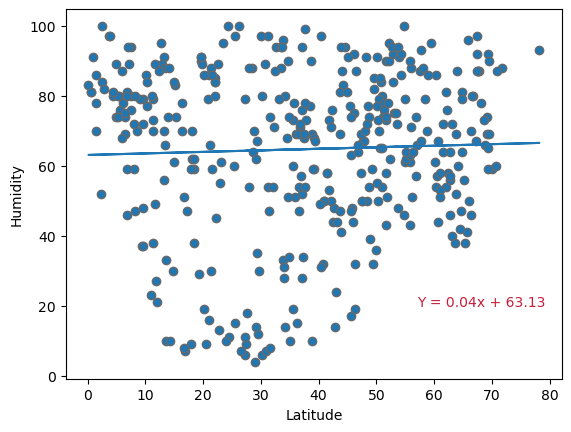

In [99]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "City Latitude vs Max Temperature (F)"
eq_coord = (57, 20)

linear_regression(x_values, y_values, title, "Humidity", eq_coord)

R-value: 0.011343803021953685


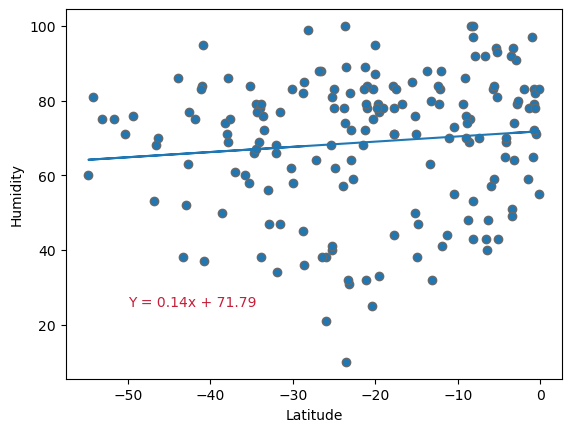

In [100]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "City Latitude vs Max Temperature (F)"
eq_coord = (-50, 25)

linear_regression(x_values, y_values, title, "Humidity", eq_coord)

**Discussion about the linear relationship:** There appears to be no solid correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

R-value: 0.0016196184692105803


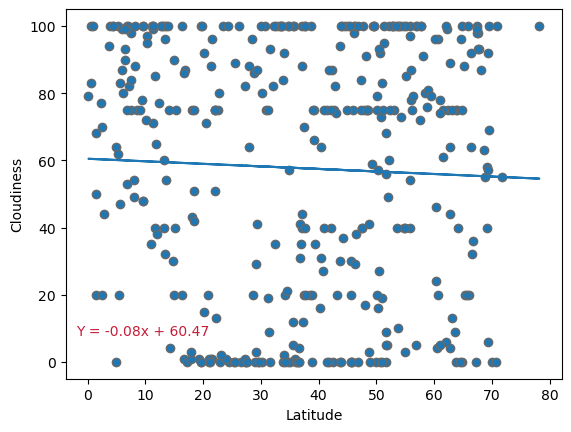

In [101]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = "City Latitude vs Max Temperature (F)"
eq_coord = (-2, 8)

linear_regression(x_values, y_values, title, "Cloudiness", eq_coord)

R-value: 0.006021308125499816


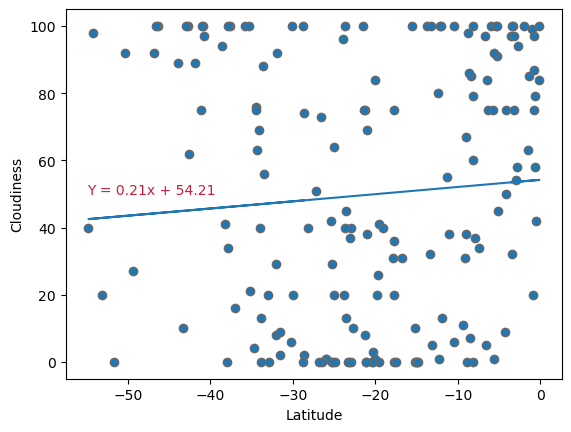

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "City Latitude vs Max Temperature (F)"
eq_coord = (-55, 50)

linear_regression(x_values, y_values, title, "Cloudiness", eq_coord)

**Discussion about the linear relationship:** Based on the line of best fit, cloudiness appears to increase very slightly the closer the city is to the equator, but there are lots of data points that don't follow this trend so the correlation is weak.

### Wind Speed vs. Latitude Linear Regression Plot

R-value: 0.0007770357360611616


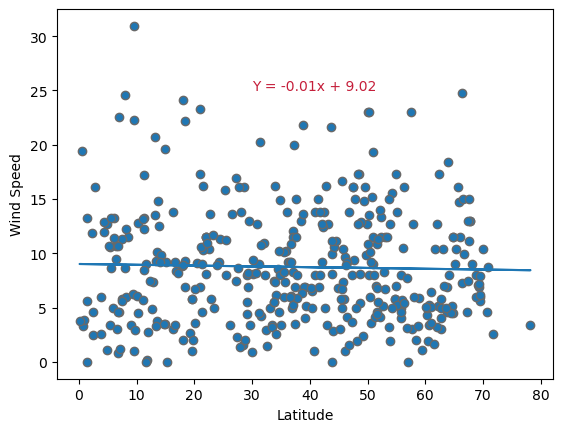

In [103]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = "City Latitude vs Max Temperature (F)"
eq_coord = (30, 25)

linear_regression(x_values, y_values, title, "Wind Speed", eq_coord)

R-value: 0.02897090959109864


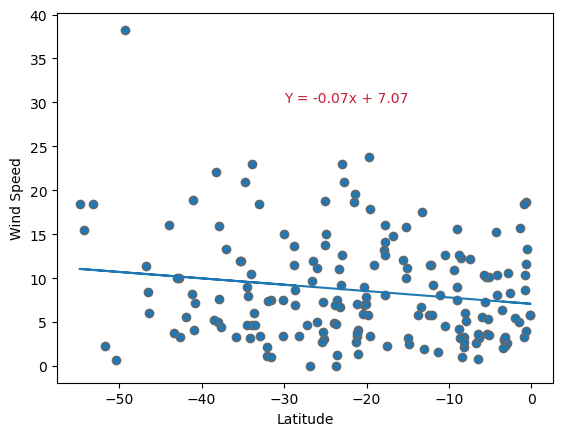

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = "City Latitude vs Max Temperature (F)"
eq_coord = (-30, 30)

linear_regression(x_values, y_values, title, "Wind Speed", eq_coord)

**Discussion about the linear relationship:** There appears to be no correlation with latitude and wind speed.